### 책의 평점정보를 이용한 클러스터링

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 데이터 로딩

In [2]:
#books.csv 파일을 로딩하세요. book_id, title 컬럼만 뽑으세요.
#rating.csv 파일을 로딩하세요. 

df_books = pd.read_csv('../books.csv')[['book_id', 'title']]
df_rat = pd.read_csv('../ratings.csv')
df_books.head()


,book_id,title
0,2767052,"The Hunger Games (The Hunger Games, #1)"
1,3,Harry Potter and the Sorcerer's Stone (Harry P...
2,41865,"Twilight (Twilight, #1)"
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby


In [3]:
df_rat.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
#df_books 데이터 프레임과, df_rat 데이터 프레임을 머지하세요. 

df = pd.merge(df_books, df_rat)[['title', 'user_id', 'rating']]
df.head()

,title,user_id,rating
0,Harry Potter and the Sorcerer's Stone (Harry P...,314,3
1,Harry Potter and the Sorcerer's Stone (Harry P...,588,1
2,Harry Potter and the Sorcerer's Stone (Harry P...,2077,2
3,Harry Potter and the Sorcerer's Stone (Harry P...,2487,3
4,Harry Potter and the Sorcerer's Stone (Harry P...,2900,3


In [5]:
# title로 groupby 하여 책의 개수와 user_id 별로 그룹바이하여 user수를 출력하세요.
print(len(df.groupby('title')), "books")
print(len(df.groupby('user_id')), "users")

812 books
28906 users


### 데이터탐색

In [12]:
# df 데이터를 피벗팅을 통해 아래와 같은 결과를 출력하세요.(아래 count_nonzero 는 카운트 값을 의미합니다.)
df_rating_stats_by_book = df.pivot_table(index='title', values='rating', aggfunc=[np.mean, np.count_nonzero] )
df_rating_stats_by_book
 

,mean,count_nonzero
,rating,rating
title,,
'Salem's Lot,3.932432,74
"'Tis (Frank McCourt, #2)",3.970000,100
1421: The Year China Discovered America,3.750000,100
1776,3.930000,100
1984,3.170000,100
A Bend in the River,3.370000,100
A Bend in the Road,4.300000,100
A Brief History of Time,3.570000,100


In [13]:
# 위의 데이터를 기준으로 평점평균이 높은순으로 5건만 출력하세요.
df_rating_stats_by_book = df_rating_stats_by_book.sort_values(by=('mean','rating'), ascending=False)
df_rating_stats_by_book.head(5)

,mean,count_nonzero
,rating,rating
title,,
Still Life with Woodpecker,4.777778,99
The Beautiful and Damned,4.660000,100
Villa Incognito,4.618557,97
"Peter and the Shadow Thieves (Peter and the Starcatchers, #2)",4.557143,70
The Taste of Home Cookbook,4.550000,100


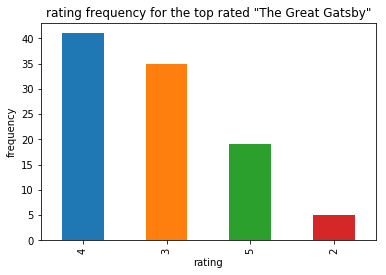

In [14]:
# 책제목중 'The Great Gatsby' 를 찾아, rating이 몇개씩 일어났는지 카운트하고, ploting 하세요. 

df_best_avg = df[df.title == 'The Great Gatsby']
df_best_avg['rating'].value_counts().plot.bar()
plt.title('rating frequency for the top rated "The Great Gatsby"')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.show()

### 평점에 근거한 클러스터링 

In [23]:
# 원본데이터인 df 에서 'user_id'와 'rating'컬럼만 뽑으세요.
df_user_rating = df[['user_id', 'rating']]
df_user_rating.head(5)

,user_id,rating
0,314,3
1,588,1
2,2077,2
3,2487,3
4,2900,3


In [18]:
# userid 와 rating 으로 groupby 하세요. 
df_user_rating_freq = df_user_rating.groupby(['user_id', 'rating'])['user_id'].agg(['count'])
df_user_rating_freq.head(10)

count
user_id rating       
2       4           1
3       1           1
4       2           1
7       3           2
        5           2
9       4           1
10      2           1
        4           2
11      4           1
14      3           1

In [15]:
# 원본데이터인 df 에서 'user_id'와 'rating'컬럼만 뽑아서 피벗팅을 수행하세요. 

df_user_rating = df[['user_id', 'rating']]
df_user_rating.head(10)
df_user_rating['count'] = 1
df_user_rating.sort_values('user_id')

df_user_rating.pivot_table(index='user_id', columns='rating', values='count', aggfunc='count',fill_value=0)

rating,1,2,3,4,5
user_id,,,,,
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0
7,0,0,2,0,2
9,0,0,0,1,0
10,0,1,0,2,0
11,0,0,0,1,0
14,0,0,1,0,0
15,0,0,0,1,0


In [19]:
# 위에서 만든 데이터 프레임에 대해 pivot을 수행하세요. 
df_rating_pivot = df_user_rating_freq.pivot_table(index='user_id', columns='rating', values='count', fill_value=0)
df_rating_pivot.head()

rating,1,2,3,4,5
user_id,,,,,
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0
7,0,0,2,0,2
9,0,0,0,1,0


In [20]:
# Kmeans 군집분석을 수행하세요. 클러스터 개수는 5입니다. 
# df_rating_pivot 데이터 프레임의 value 부분만 학습시키세요.
kmeans = KMeans(n_clusters=5).fit(df_rating_pivot.values)

# kmeans 수행결과를 df_rating_pivot 에 새로운 'cluster' 컬럼을 추가하여, kmeans 결과를 매핑하세요. 
df_rating_pivot['cluster'] = kmeans.labels_


df_rating_pivot

rating,1,2,3,4,5,cluster
user_id,,,,,,
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
7,0,0,2,0,2,3
9,0,0,0,1,0,0
10,0,1,0,2,0,0
11,0,0,0,1,0,0
14,0,0,1,0,0,0
15,0,0,0,1,0,0


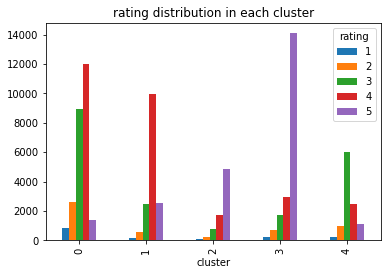

In [21]:
df_rating_pivot.groupby('cluster').sum().plot.bar()
plt.title('rating distribution in each cluster')
plt.show()